
Раунд 1:
Участник 1: Ставка = 42 единиц, Бюджет = 256 единиц
Участник 2: Ставка = 16 единиц, Бюджет = 202 единиц
Участник 3: Ставка = 45 единиц, Бюджет = 215 единиц
Участник 4: Ставка = 44 единиц, Бюджет = 500 единиц
Участник 5: Ставка = 18 единиц, Бюджет = 281 единиц

Победитель раунда 1: Участник 3 со ставкой 45 единиц

Раунд 2:
Участник 1: Ставка = 44 единиц, Бюджет = 214 единиц
Участник 2: Ставка = 21 единиц, Бюджет = 186 единиц
Участник 3: Ставка = 22 единиц, Бюджет = 170 единиц
Участник 4: Ставка = 11 единиц, Бюджет = 456 единиц
Участник 5: Ставка = 26 единиц, Бюджет = 263 единиц

Победитель раунда 2: Участник 1 со ставкой 44 единиц

Раунд 3:
Участник 1: Ставка = 50 единиц, Бюджет = 170 единиц
Участник 2: Ставка = 22 единиц, Бюджет = 165 единиц
Участник 3: Ставка = 38 единиц, Бюджет = 148 единиц
Участник 4: Ставка = 17 единиц, Бюджет = 445 единиц
Участник 5: Ставка = 42 единиц, Бюджет = 237 единиц

Победитель раунда 3: Участник 1 со ставкой 50 единиц

Раунд 4:
Участник 1: Ставка

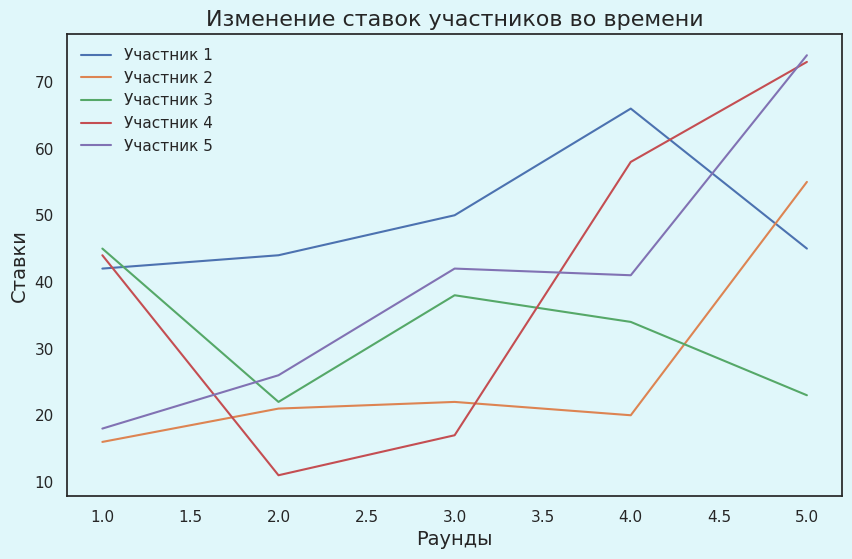

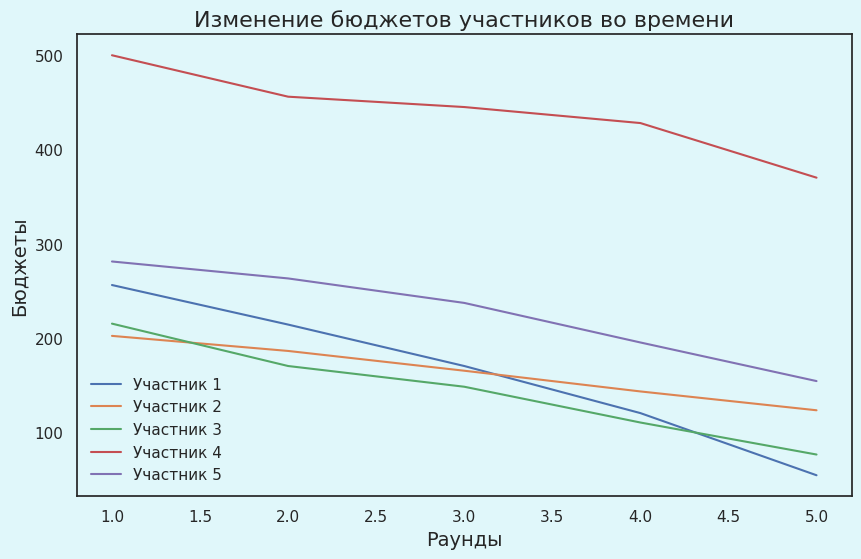


Итоговые результаты:
Участник 1: Оставшийся бюджет = 9 единиц
Участник 2: Оставшийся бюджет = 68 единиц
Участник 3: Оставшийся бюджет = 53 единиц
Участник 4: Оставшийся бюджет = 297 единиц
Участник 5: Оставшийся бюджет = 80 единиц


In [10]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Параметры аукциона
num_players = 5   # Количество участников
max_bid = 100     # Максимальная возможная ставка
num_rounds = 5    # Количество раундов
risk_factor = 0.5 # Коэффициент риска - доля бюджета, которую игрок готов поставить

# Создание участников с бюджетами
players = {}
for i in range(1, num_players + 1):
    budget = random.randint(200, 500)  # Каждый участник имеет случайный бюджет
    players[f"Участник {i}"] = {"budget": budget, "bid": 0}

# Данные для визуализации
bids_history = {player: [] for player in players}
budgets_history = {player: [] for player in players}

# Проведение нескольких раундов аукциона
for round_num in range(1, num_rounds + 1):
    print(f"\nРаунд {round_num}:")

    # Участники делают ставки с учётом риска и текущего бюджета
    for player in players:
        max_possible_bid = min(players[player]["budget"], max_bid)
        bid = random.randint(1, int(max_possible_bid * risk_factor))
        players[player]["bid"] = bid

    # Печать всех ставок участников
    for player, data in players.items():
        print(f"{player}: Ставка = {data['bid']} единиц, Бюджет = {data['budget']} единиц")
        # Сохранение ставок и бюджетов для визуализации
        bids_history[player].append(data["bid"])
        budgets_history[player].append(data["budget"])

    # Определение победителя текущего раунда
    winner = max(players, key=lambda x: players[x]["bid"])
    winning_bid = players[winner]["bid"]

    # Печать результатов раунда
    print(f"\nПобедитель раунда {round_num}: {winner} со ставкой {winning_bid} единиц")

    # Обновление бюджета участников
    for player in players:
        players[player]["budget"] -= players[player]["bid"]

    # Сложные стратегии: "наблюдение" и адаптация ставок
    # Победитель предыдущего раунда может попытаться увеличить свою ставку в следующем раунде
    for player in players:
        if player == winner:
            risk_factor = min(1.0, risk_factor + 0.1)  # Победитель может увеличить свой риск

# Визуализация с использованием Seaborn
sns.set(style="white")  # Убираем сетку

# Настройки фона графика
def set_background_color(ax, color):
    ax.set_facecolor(color)
    ax.figure.set_facecolor(color)

# Визуализация ставок
plt.figure(figsize=(10, 6))
for player, bids in bids_history.items():
    sns.lineplot(x=range(1, num_rounds + 1), y=bids, label=player)
plt.title('Изменение ставок участников во времени', fontsize=16)
plt.xlabel('Раунды', fontsize=14)
plt.ylabel('Ставки', fontsize=14)
plt.legend()

# Изменение фона графика на светло-голубой
ax = plt.gca()  # Получаем текущие оси
set_background_color(ax, '#E0F7FA')
plt.show()

# Визуализация бюджетов
plt.figure(figsize=(10, 6))
for player, budgets in budgets_history.items():
    sns.lineplot(x=range(1, num_rounds + 1), y=budgets, label=player)
plt.title('Изменение бюджетов участников во времени', fontsize=16)
plt.xlabel('Раунды', fontsize=14)
plt.ylabel('Бюджеты', fontsize=14)
plt.legend()

# Изменение фона графика на светло-голубой
ax = plt.gca()
set_background_color(ax, '#E0F7FA')
plt.show()

# Итоговые результаты после всех раундов
print("\nИтоговые результаты:")
for player, data in players.items():
    print(f"{player}: Оставшийся бюджет = {data['budget']} единиц")
